In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
credit_data = pd.read_csv("credit.csv")

In [3]:
credit_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
credit_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
credit_data.shape

(100000, 28)

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
credit_data["Customer_ID"].nunique()

12500

#### Data cleaning

* Missing Values 

In [8]:
credit_data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

* Duplicated values

In [9]:
credit_data.duplicated().sum()

0

In [10]:
#sns.boxplot(x = credit_data["Num_Bank_Accounts"])

* Inconsistant Data

In [11]:
credit_data.loc[41488:41490]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41488,67866,30454,1,arani Krishnand,35.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,35.360669,327.0,No,207.563979,97.999771,Low_spent_Small_value_payments,550.292055,Good
41489,67867,30454,2,arani Krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,37.266182,327.0,No,207.563979,97.999771,High_spent_Large_value_payments,619.402043,Good
41490,67868,30454,3,arani Krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,35.699842,328.0,No,207.563979,97.999771,Low_spent_Large_value_payments,197.101905,Good


In [12]:
# proper format for name column

credit_data["Name"] = credit_data["Name"].str.capitalize()

In [13]:
credit_data[credit_data["Customer_ID"] == 30454].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41488,67866,30454,1,Arani krishnand,35.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,35.360669,327.0,No,207.563979,97.999771,Low_spent_Small_value_payments,550.292055,Good
41489,67867,30454,2,Arani krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,37.266182,327.0,No,207.563979,97.999771,High_spent_Large_value_payments,619.402043,Good
41490,67868,30454,3,Arani krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,35.699842,328.0,No,207.563979,97.999771,Low_spent_Large_value_payments,197.101905,Good
41491,67869,30454,4,Arani krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,29.731132,329.0,No,207.563979,97.999771,High_spent_Large_value_payments,654.341121,Good
41492,67870,30454,5,Arani krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,36.700047,330.0,No,207.563979,97.999771,Low_spent_Medium_value_payments,242.334107,Good


In [14]:
# Dealing with "Payment_of_Min_Amount" column

credit_data["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [15]:
minpay_mode = credit_data["Payment_of_Min_Amount"].mode()[0]

credit_data["Payment_of_Min_Amount"].replace("NM", minpay_mode, inplace = True)

In [16]:
credit_data[credit_data["Payment_of_Min_Amount"] == "NM"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


<Axes: xlabel='Num_Bank_Accounts', ylabel='Count'>

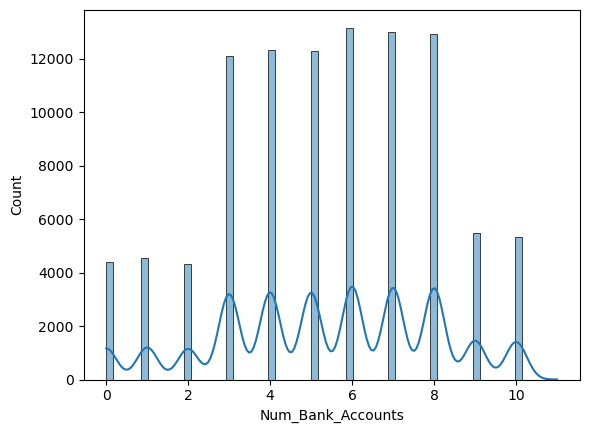

In [17]:
# Dealing with "Num_bnk_account" column

sns.histplot(x = credit_data["Num_Bank_Accounts"], kde=True)

In [18]:
mode_bnkacc = credit_data["Num_Bank_Accounts"].mode()[0]
print(mode_bnkacc)
credit_data["Num_Bank_Accounts"].replace(0, mode_bnkacc, inplace=True)

6.0


In [19]:
credit_data[credit_data["Num_Bank_Accounts"] == 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


### EDA

In [20]:
credit_data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.633840,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.323674,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,1.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,4.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,6.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [21]:
# distribution of occupation

work = credit_data.groupby("Customer_ID")["Occupation"].first().value_counts().reset_index(name = "Count")
work.rename({"index":"Occupation"}, axis=1, inplace=True)
work



,Occupation,Count
0,Lawyer,887
1,Engineer,858
2,Architect,853
3,Mechanic,847
4,Accountant,843
5,Scientist,843
6,Developer,840
7,Media_Manager,840
8,Teacher,834
9,Entrepreneur,831


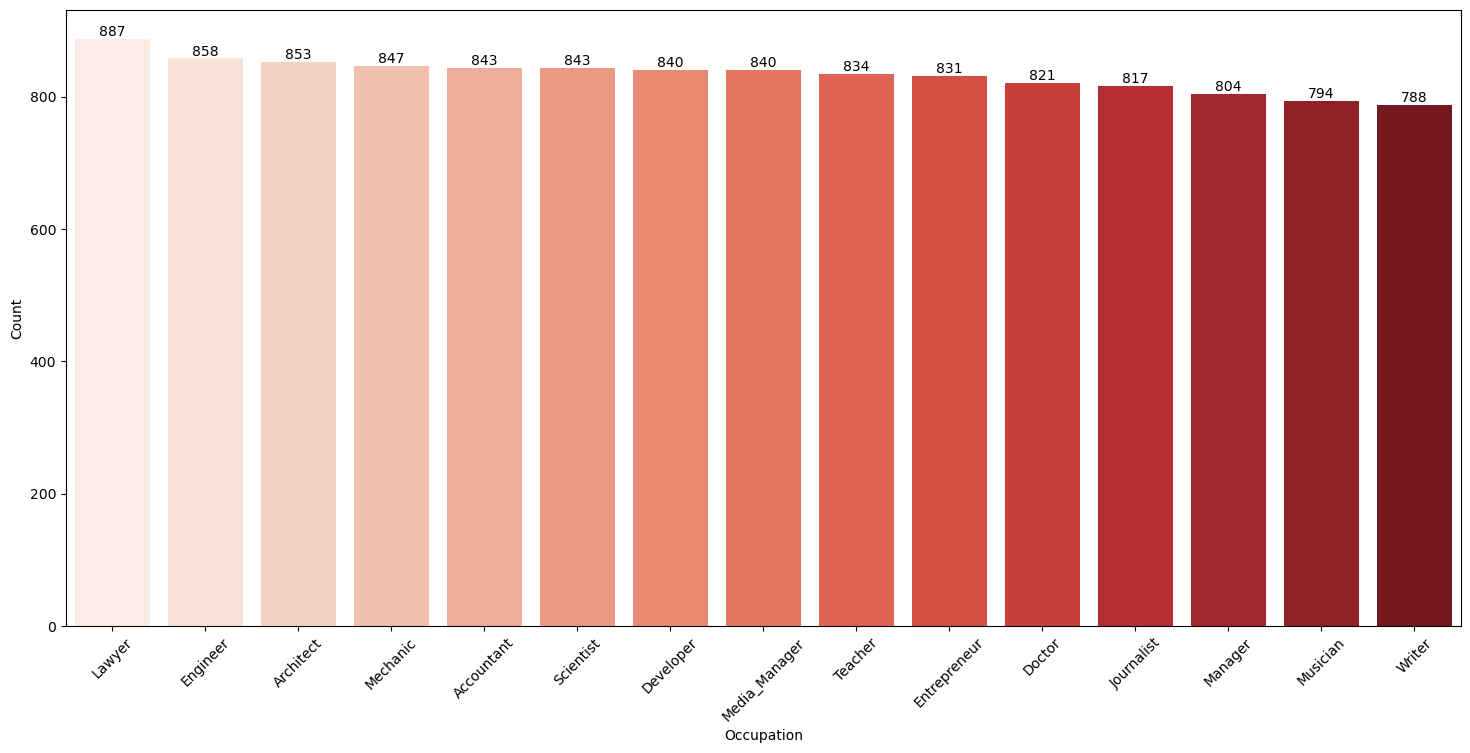

In [22]:
plt.figure(figsize=(18,8))
ax = sns.barplot(y = work["Count"], x = work["Occupation"], palette="Reds")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()

In [23]:
# Number of Bank account

bank_acc = credit_data.groupby('Customer_ID')['Num_Bank_Accounts'].value_counts().reset_index(name='Count')

bank_acc

,Customer_ID,Num_Bank_Accounts,Count
0,1006,9.0,8
1,1007,3.0,8
2,1008,6.0,8
3,1009,6.0,8
4,1011,3.0,8
...,...,...,...
12798,50984,6.0,8
12799,50990,7.0,8
12800,50992,7.0,8
12801,50996,3.0,8


In [24]:
#for same account there are different number of bank accounts
bank_acc[bank_acc["Customer_ID"] == 27857]

,Customer_ID,Num_Bank_Accounts,Count
6956,27857,10.0,4
6957,27857,11.0,4


In [25]:
#bank_acc["Num_Bank_Accounts"].value_counts()

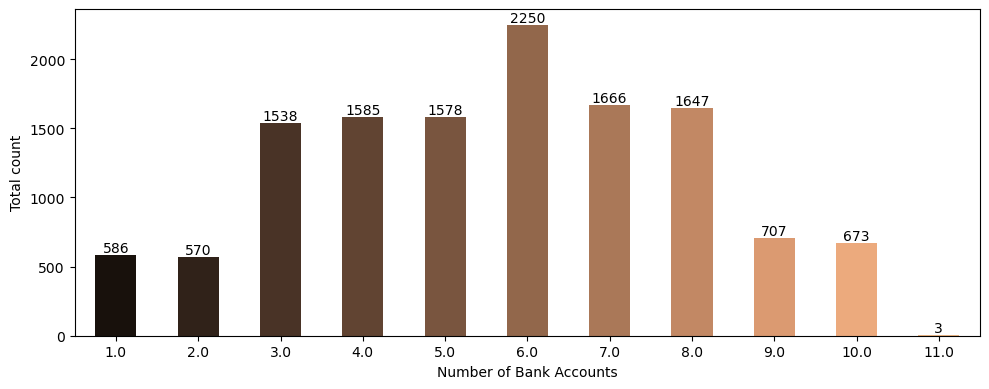

In [26]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x = bank_acc["Num_Bank_Accounts"].value_counts().index, y = bank_acc["Num_Bank_Accounts"].value_counts().values, palette = "copper", width=0.5)
ax.bar_label(ax.containers[0])
plt.ylabel("Total count")
plt.xlabel("Number of Bank Accounts")

plt.tight_layout()
plt.show()

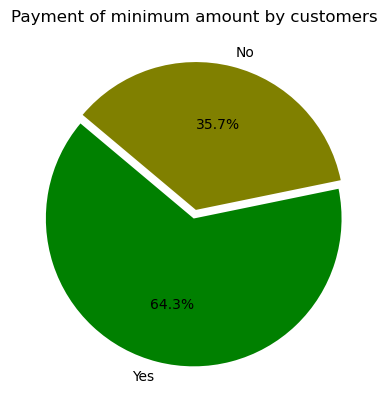

In [27]:
# Payment of Min Amount

min_pay = credit_data["Payment_of_Min_Amount"].value_counts()
#print(min_pay)

plt.figure()
plt.pie(x = min_pay.values, labels=["Yes","No"], explode = [0.03,0.03], colors=["green","olive"],  autopct='%1.1f%%', startangle=140)
plt.title("Payment of minimum amount by customers")
plt.show()

In [28]:
# Annual income

annual_income = credit_data.groupby('Customer_ID')['Annual_Income'].value_counts().reset_index(name='Count')


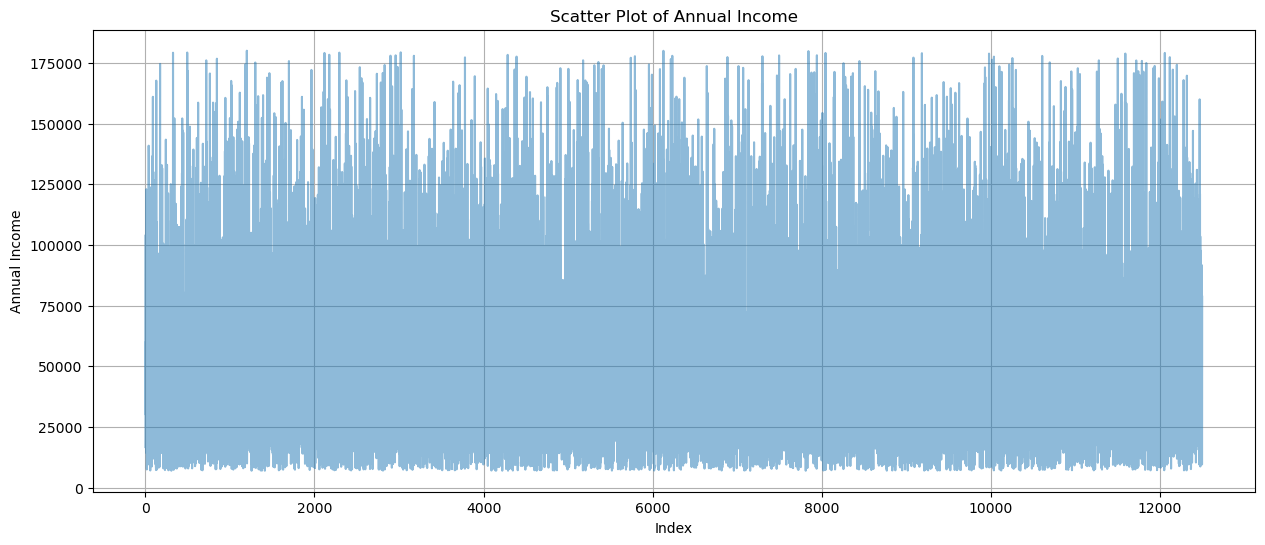

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(annual_income.index, annual_income['Annual_Income'], alpha=0.5)
plt.title('Scatter Plot of Annual Income')
plt.xlabel('Index')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()



C:\Users\Unni\AppData\Local\Temp\ipykernel_6916\2147021943.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_data.corr(), annot=True)


<Axes: >

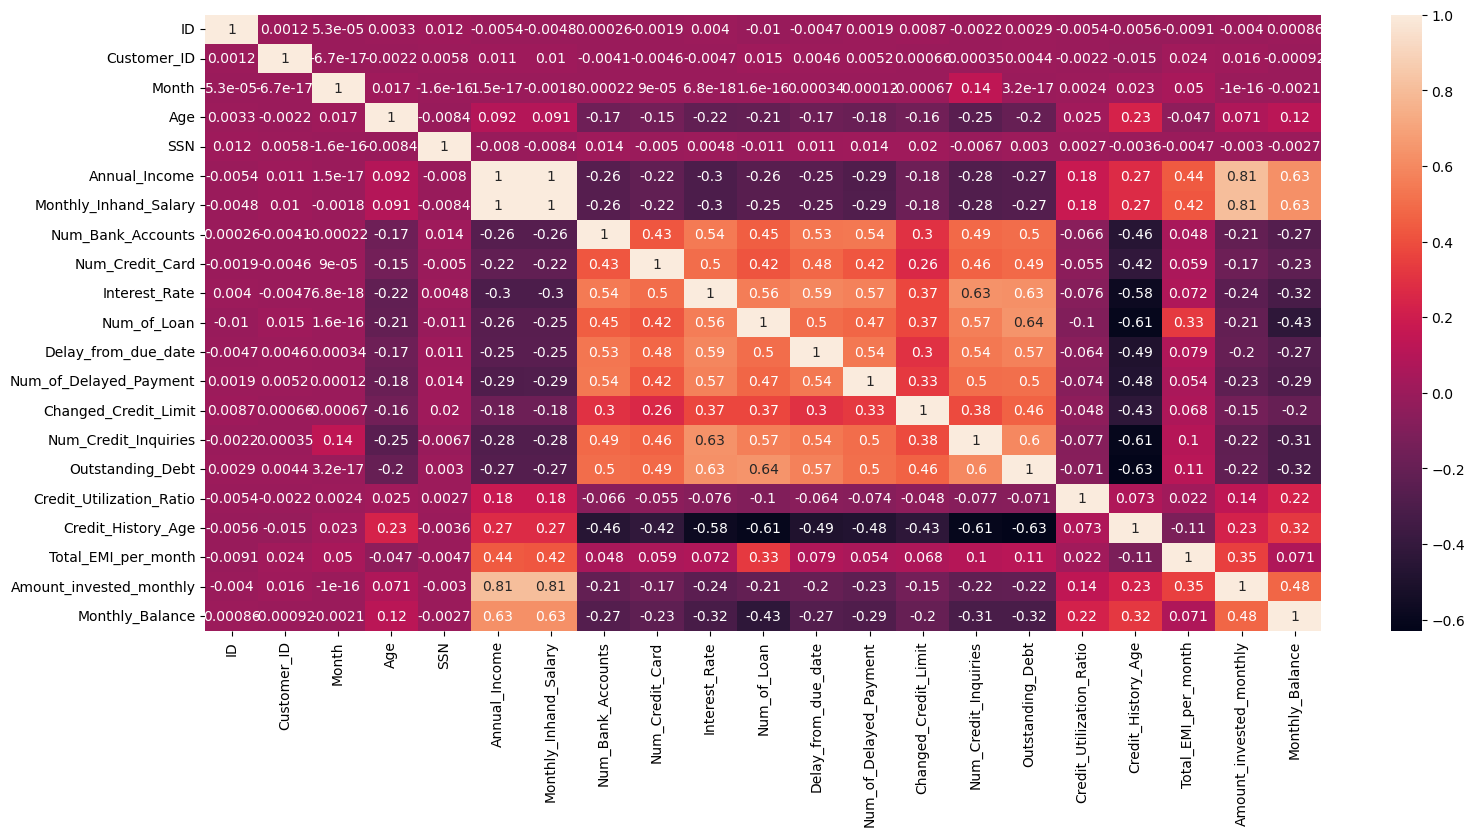

In [30]:
# Heat map

plt.figure(figsize=(18,8))
sns.heatmap(credit_data.corr(), annot=True)

In [31]:
# Distribution of Credit_Score

credit_score = credit_data.groupby("Customer_ID")["Credit_Score"].value_counts().reset_index(name = "count")
credit_score["Credit_Score"].value_counts()


Standard    11100
Poor         5203
Good         3519
Name: Credit_Score, dtype: int64

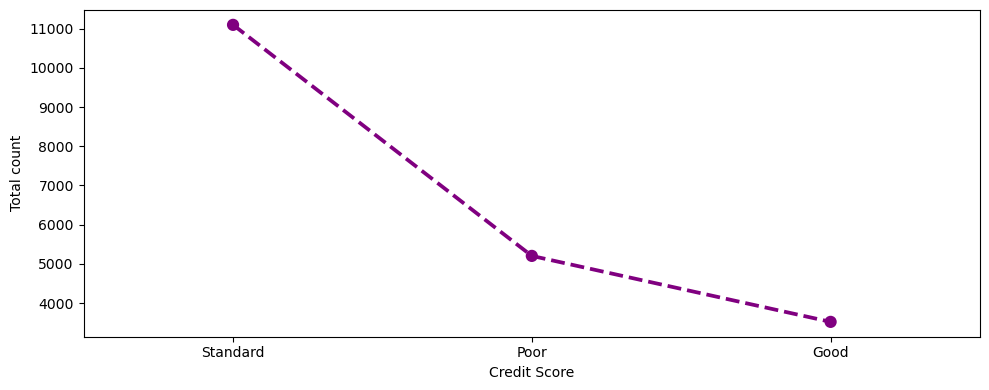

In [32]:
plt.figure(figsize=(10,4))
ax = sns.pointplot(x = credit_score["Credit_Score"].value_counts().index, y = credit_score["Credit_Score"].value_counts().values,linestyles='--',color="purple" )
plt.xlabel("Credit Score")
plt.ylabel("Total count")
plt.tight_layout()
plt.show()